In [ ]:
import matplotlib.pyplot as plt
import gluoncv as gcv
import mxnet as mx
from mxnet import gluon, nd, image
from mxnet.gluon.data.vision import transforms
from gluoncv import utils
from gluoncv.model_zoo import get_model

100%|██████████| 101/101 [00:00<00:00, 3146.42KB/s]

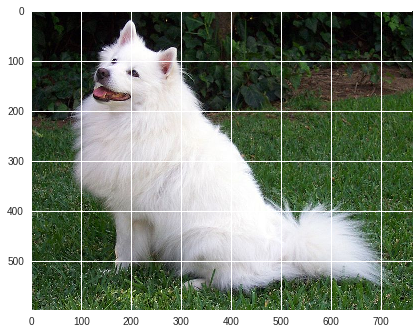

In [ ]:
url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/4/47/American_Eskimo_Dog.jpg/764px-American_Eskimo_Dog.jpg'
im_fname = utils.download(url)

img = image.imread(im_fname)

plt.imshow(img.asnumpy())
plt.show()

In [ ]:
transform_fn = transforms.Compose([
    transforms.Resize(32),
    transforms.CenterCrop(32),
    transforms.ToTensor(),
    transforms.Normalize([0.4914, 0.4822, 0.4465], [0.2023, 0.1994, 0.2010])
])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


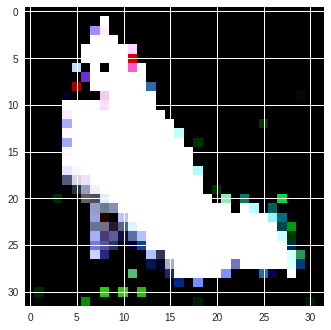

In [ ]:
img = transform_fn(img)
plt.imshow(nd.transpose(img, (1,2,0)).asnumpy())
plt.show()

In [ ]:
net = get_model('cifar_resnet110_v1', classes=10, pretrained=True)

Model file is not found. Downloading.


6336KB [00:00, 9821.30KB/s]                          


In [ ]:
pred = net(img.expand_dims(axis=0))

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
ind = nd.argmax(pred, axis=1).astype('int')
print('The input picture is classified as [%s], with probability %.3f.'%
      (class_names[ind.asscalar()], nd.softmax(pred)[0][ind].asscalar()))

The input picture is classified as [dog], with probability 0.999.
